In [2]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
import skimage.data as data


Text(0.5, 1.0, 'Original Image: (200, 200)')

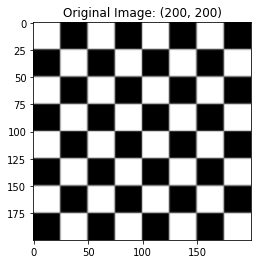

In [4]:
img_org = data.checkerboard()
plt.imshow(img_org, cmap='gray')
plt.title(f'Original Image: {img_org.shape}')

## 6.1
    

array([[ 0, -1],
       [ 1,  0]])

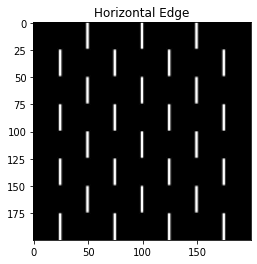

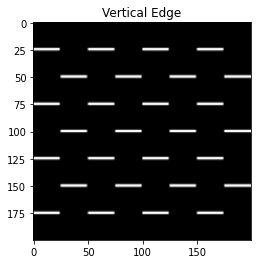

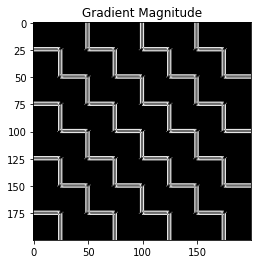

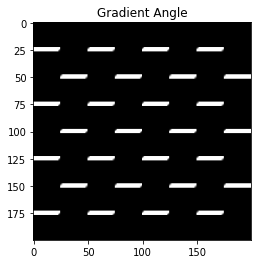

In [14]:
def sobel_edge_detection(image, filter, verbose=False):
    #G_dx = convolution(image, filter, verbose)
    G_dx = cv2.filter2D(image, -1, filter)
    if verbose:
        plt.imshow(G_dx, cmap='gray')
        plt.title("Horizontal Edge")
        plt.show()
        
    #G_dy = convolution(image, np.flip(filter.T, axis=0), verbose)
    G_dy = cv2.filter2D(image,-1, np.flip(filter.T, axis=0))
    
    if verbose:
        plt.imshow(G_dy, cmap='gray')
        plt.title("Vertical Edge")
        plt.show()
    
    gradient_magnitude = np.sqrt(np.square(G_dx) + np.square(G_dy))
 
    gradient_magnitude *= 255.0 / gradient_magnitude.max()
    gradient_angle = np.arctan2(G_dy, G_dx)
     
    if verbose:
        plt.imshow(gradient_magnitude, cmap='gray')
        plt.title("Gradient Magnitude")
        plt.show()
        
        plt.imshow(gradient_angle, cmap='gray')
        plt.title("Gradient Angle")
        plt.show()
    
    return gradient_magnitude, gradient_angle



filter = np.array([[0, 0, 0],
                   [-1, 0, 1],
                   [0, 0, 0]
                ])

gradient_magnitude, gradient_angle = sobel_edge_detection(img_org, filter=filter, verbose=True)

## 6.2

Text(0.5, 1.0, 'Original Image: (512, 512)')

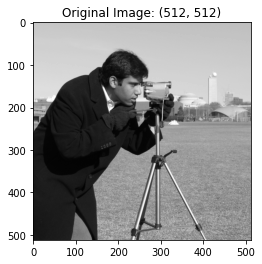

In [15]:
img_org = data.camera()
plt.imshow(img_org, cmap='gray')
plt.title(f'Original Image: {img_org.shape}')

### Laplacien

In [52]:
filter = np.array((
	[0, 1, 0],
	[1, -4, 1],
	[0, 1, 0]))

Text(0.5, 1.0, 'Laplacian Image: (0, 255)')

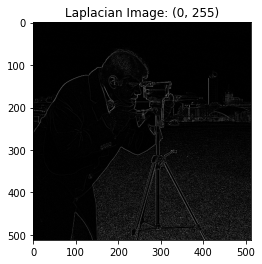

In [53]:
laplacian = cv2.filter2D(img_org, ddepth=-1,kernel=filter)
plt.imshow(laplacian, cmap='gray')
plt.title(f'Laplacian Image: {laplacian.min(), laplacian.max()}')

### Sharpening

Text(0.5, 1.0, 'Sharpened Image: (0, 255)')

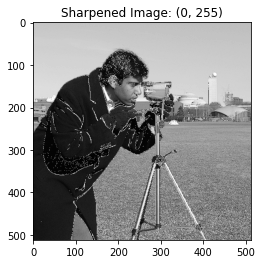

In [58]:
out = img_org - laplacian
out = cv2.convertScaleAbs(out)
plt.imshow(out, cmap='gray')
plt.title(f'Sharpened Image: {out.min(), out.max()}')

### 45 degree sharpening

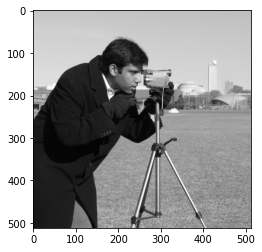

In [71]:
def select_polar_angle(angle, threshold):
    return np.where(np.abs(angle) < threshold, 0, angle)

filter = np.array([[0, 0, 0],
                   [-1, 0, 1],
                   [0, 0, 0]
                ])

gradient_magnitude, gradient_angle = sobel_edge_detection(img_org, filter=filter, verbose=False)
select_angle = select_polar_angle(gradient_angle, np.pi/4)
sharpened_image = img_org - select_angle

plt.imshow(sharpened_image, cmap='gray')

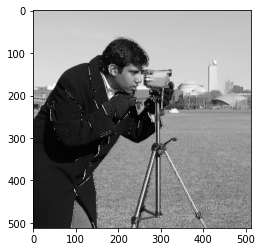

In [74]:
def sharpen(img):
	filter = np.array([[0, 0, 0],
					   [-1, 0, 1],
					   [0, 0, 0]
					])
	laplacian = cv2.filter2D(img, ddepth=-1,kernel=filter)
	out = img - laplacian
	out = cv2.convertScaleAbs(out)
	return out

sharpened_image = sharpen(img_org)
plt.imshow(sharpened_image, cmap='gray')